<a href="https://colab.research.google.com/github/Mata-68/desafio_alura_store/blob/main/DesafioAluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Función para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Análisis de facturación
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturación total
print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


In [4]:
# Sumando solo el precio de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

# Mostrar los resultados
print(f"Facturación Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:.2f}")

# Facturación total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:.2f}")


Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


# 2. Ventas por categoría

In [5]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categoría
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categoría en Tienda {i+1}:")

    # Diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Agregar al diccionario de la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        # Agregar al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categoría en Tienda 1:
  Electrónicos: $1290390700.00
  Muebles: $582928200.00
  Juguetes: $49062800.00
  Electrodomésticos: $1032375600.00
  Artículos para el hogar: $38316800.00
  Deportes y diversión: $126883700.00
  Libros: $25769400.00
  Instrumentos musicales: $276990500.00

Ventas por categoría en Tienda 2:
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversión: $81660600.00
  Electrónicos: $1286643600.00
  Artículos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodomésticos: $1026226300.00
  Libros: $31417000.00

Ventas por categoría en Tienda 3:
  Electrodomésticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversión: $123399200.00
  Electrónicos: $1101334500.00
  Juguetes: $61190400.00
  Artículos para el hogar: $44724600.00
  Libros: $26358900.00

Ventas por categoría en Tienda 4:
  Electrodomésticos: $879089600.00
  Muebles: $556628000.00
  Deportes y diversión: $10

In [6]:
# Función para calcular y mostrar las ventas por categoría de una tienda
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en Tienda {numero}:")
    print(ventas)

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               

# 3. Calificación promedio de la tienda


In [7]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificación' in producto:
                calificacion = float(producto['calificación'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


In [8]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [9]:
from collections import defaultdict

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo mágico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex -

In [10]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# El ingreso es simplemente el Precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Función para mostrar los 3 productos que más y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista única de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Envío promedio por tienda

In [11]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


In [12]:
# Asegurar que el costo de envío es numérico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


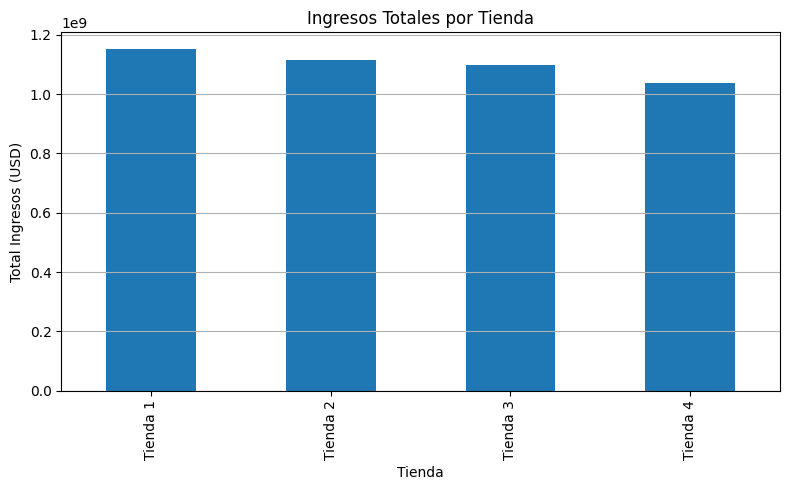

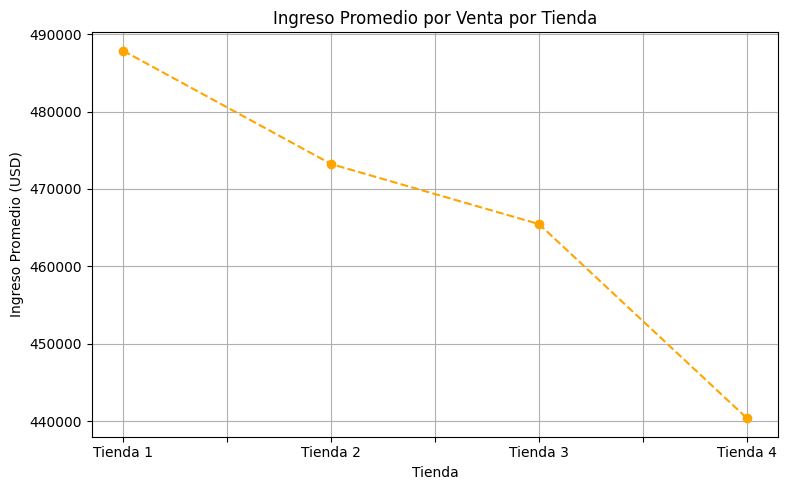

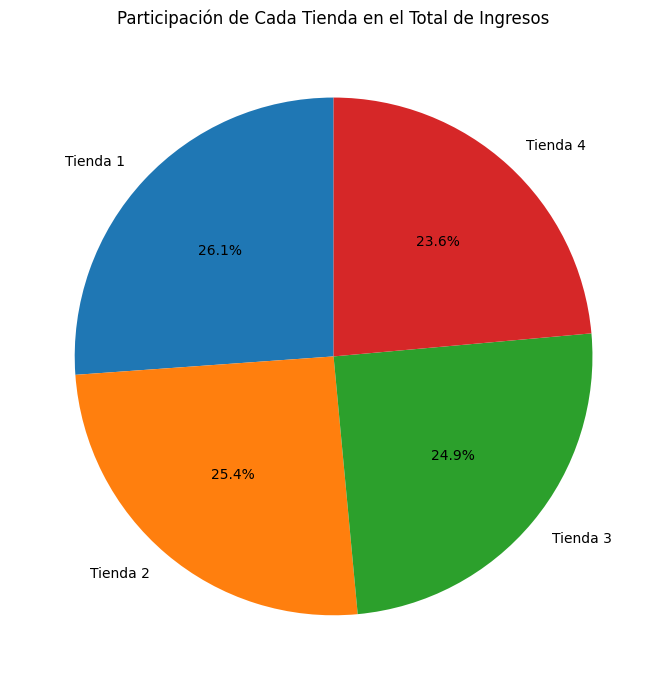

In [13]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar tipo correcto
df_total['Precio'] = df_total['Precio'].astype(float)

# El ingreso de cada venta es simplemente el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# 🎨 Graficar 3 gráficos verdaderamente diferentes

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Línea: Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Torta/Pie: Distribución del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

# ***6.-  Revisión de Archivos***





In [15]:
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda,Ingreso
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1,164300.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1,192300.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1,209600.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1,757500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,335200.0


In [16]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
 13  Ingreso                 9435 non-null   float64
dtypes: float64(5), int64(2), object(7)
memor

In [17]:
df_total.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon,Ingreso
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9.435000e+03
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108,4.667323e+05
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155,5.903207e+05
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110,7.600000e+03
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590,5.520000e+04
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040,2.215000e+05
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750,6.633000e+05
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900,2.977000e+06


In [18]:
df_total.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda',
       'Ingreso'],
      dtype='object')

# ***7.-  Cálcular ventas (ingresos) por tienda***

In [19]:
# Calcular ingresos por tienda
ingresos_por_tienda = df_total.groupby('Tienda')['Ingreso'].sum().sort_values(ascending=False)
print(ingresos_por_tienda.apply(lambda x: f"${x:,.2f}"))

Tienda
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Ingreso, dtype: object


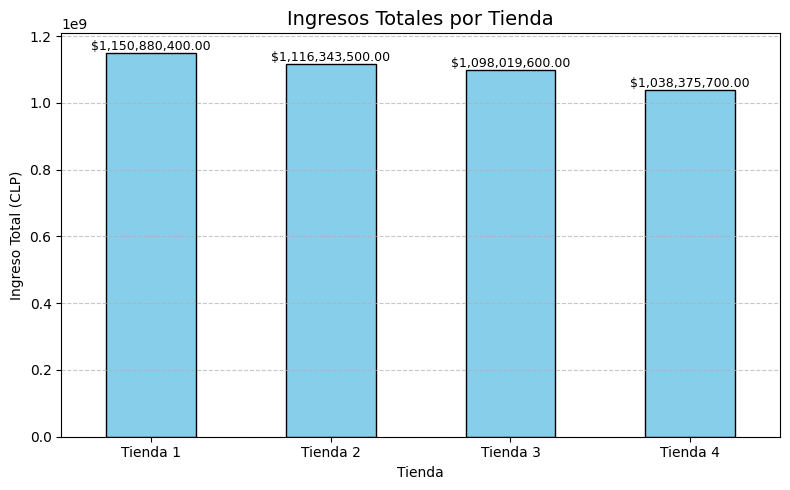

In [20]:
# Graficar los ingresos por tienda
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = ingresos_por_tienda.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total (CLP)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre cada barra
for index, value in enumerate(ingresos_por_tienda):
    plt.text(index, value, f"${value:,.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

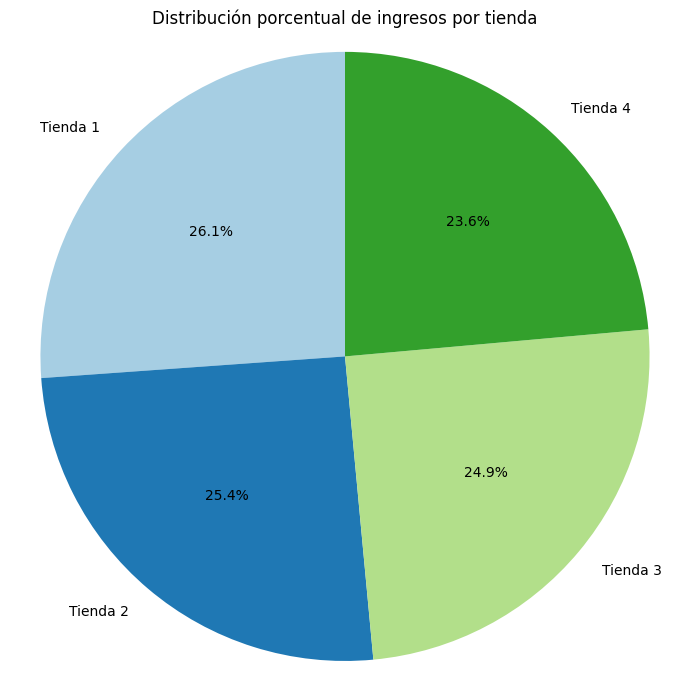

In [21]:
# graficar la distribución porcentual de ingresos por tienda
plt.figure(figsize=(7, 7))
plt.pie(
    ingresos_por_tienda,
    labels=ingresos_por_tienda.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)

plt.title('Distribución porcentual de ingresos por tienda')
plt.axis('equal')  # Para que el círculo sea perfecto
plt.tight_layout()
plt.show()

# ***8.-  Agrupar ingresos por categoría***

In [22]:
# Agrupar ingresos por categorías
ingresos_por_categoria = df_total.groupby('Categoría del Producto')['Ingreso'].sum().sort_values(ascending=True)
print(ingresos_por_categoria.apply(lambda x: f"${x:,.2f}"))

Categoría del Producto
Libros                        $37,696,100.00
Artículos para el hogar       $57,579,800.00
Juguetes                      $73,604,400.00
Deportes y diversión         $142,977,700.00
Instrumentos musicales       $348,772,600.00
Muebles                      $757,661,000.00
Electrodomésticos          $1,324,751,100.00
Electrónicos               $1,660,576,500.00
Name: Ingreso, dtype: object


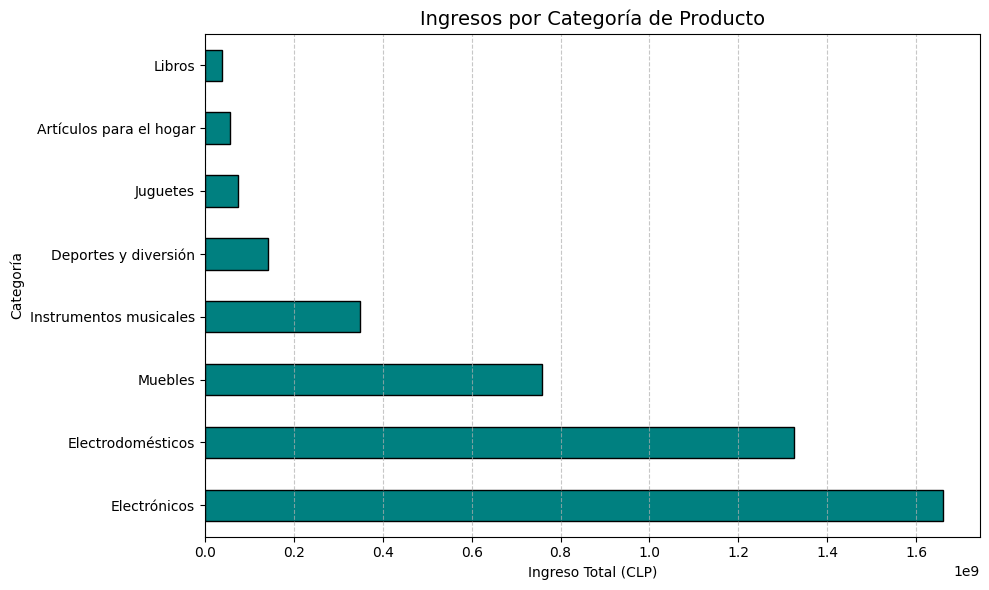

In [23]:
# Generar gráficos de los ingresos por categoría
plt.figure(figsize=(10, 6))
ingresos_por_categoria.plot(kind='barh', color='teal', edgecolor='black')

plt.title('Ingresos por Categoría de Producto', fontsize=14)
plt.xlabel('Ingreso Total (CLP)')
plt.ylabel('Categoría')
plt.gca().invert_yaxis()  # Muestra las categorías más altas abajo
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# ***9.-  Agrupar ingresos por producto y por tienda***

In [28]:
# Lista de tiendas únicas
tiendas = df_total['Tienda'].unique()

# Iterar por cada tienda
for tienda in tiendas:
    df_t = df_total[df_total['Tienda'] == tienda]
    ingresos_por_producto = df_t.groupby('Producto')['Ingreso'].sum().sort_values(ascending=False)

    print(f"\n🔸 {tienda} - Top 5 productos que MÁS ingresos generaron:")
    print(ingresos_por_producto.head(5).apply(lambda x: f"${x:,.2f}"))

    print(f"\n🔸 {tienda} - Top 5 productos que MENOS ingresos generaron:")
    print(ingresos_por_producto.tail(5).apply(lambda x: f"${x:,.2f}"))


🔸 Tienda 1 - Top 5 productos que MÁS ingresos generaron:
Producto
TV LED UHD 4K       $142,150,200.00
Refrigerador        $112,143,300.00
Iphone 15            $97,902,200.00
Smart TV             $67,452,100.00
Lavadora de ropa     $65,783,600.00
Name: Ingreso, dtype: object

🔸 Tienda 1 - Top 5 productos que MENOS ingresos generaron:
Producto
Ajedrez de madera     $1,430,600.00
Set de vasos          $1,359,100.00
Cubo mágico 8x8         $696,900.00
Dinosaurio Rex          $688,900.00
Cuerda para saltar      $652,800.00
Name: Ingreso, dtype: object

🔸 Tienda 2 - Top 5 productos que MÁS ingresos generaron:
Producto
Iphone 15           $113,225,800.00
TV LED UHD 4K       $103,375,000.00
Refrigerador         $97,632,500.00
Lavadora de ropa     $66,762,300.00
Smart TV             $61,142,000.00
Name: Ingreso, dtype: object

🔸 Tienda 2 - Top 5 productos que MENOS ingresos generaron:
Producto
Set de vasos          $1,542,600.00
Ajedrez de madera     $1,287,700.00
Cuerda para saltar      $856,

# ***10.-  Paso intermedio para graficar la información***

In [32]:
# Agrupar por Tienda y Producto, y sumar ingresos
ingresos_prod_tienda = df_total.groupby(['Producto', 'Tienda'])['Ingreso'].sum().reset_index()

# Obtener los 10 productos con mayor ingreso total (en todas las tiendas)
top10_productos = df_total.groupby('Producto')['Ingreso'].sum().sort_values(ascending=False).head(10).index

# Filtrar los datos sólo para esos productos
df_top10 = ingresos_prod_tienda[ingresos_prod_tienda['Producto'].isin(top10_productos)]

# Crear una tabla pivot para graficar
pivot = df_top10.pivot(index='Producto', columns='Tienda', values='Ingreso').fillna(0)

# ***11.-  Generar gráfico comparativo***

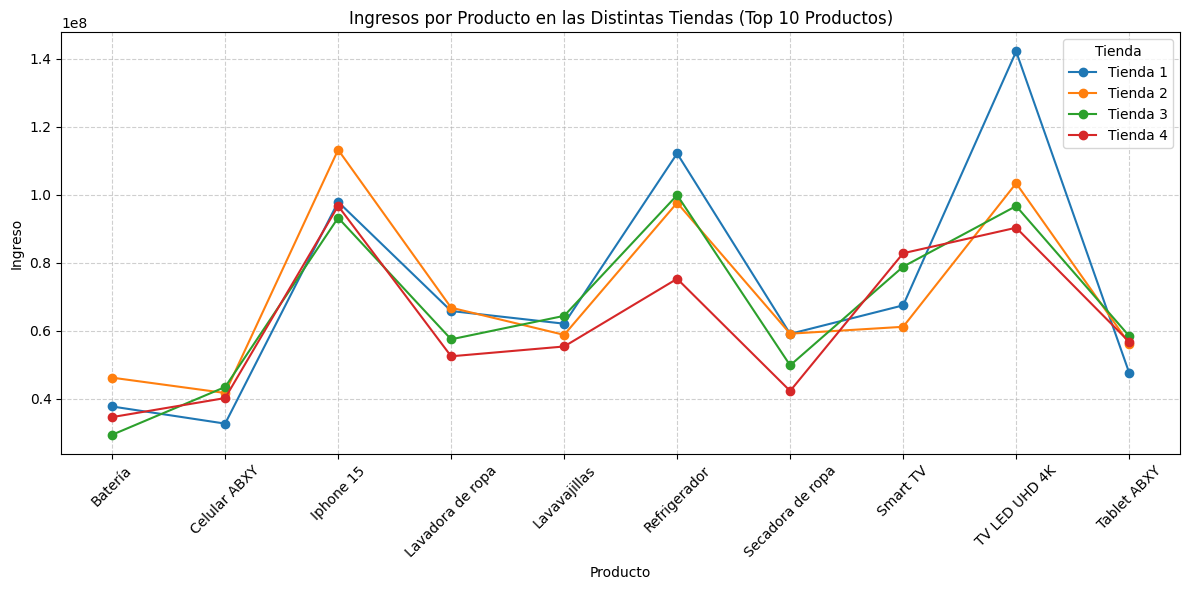

In [33]:
plt.figure(figsize=(12, 6))

for tienda in pivot.columns:
    plt.plot(pivot.index, pivot[tienda], marker='o', label=tienda)

plt.title('Ingresos por Producto en las Distintas Tiendas (Top 10 Productos)')
plt.xlabel('Producto')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

In [34]:
# Agrupar por Tienda y Producto, y sumar ingresos
ingresos_prod_tienda = df_total.groupby(['Producto', 'Tienda'])['Ingreso'].sum().reset_index()

# Obtener los 10 productos con mayor ingreso total (en todas las tiendas)
top10_productos = df_total.groupby('Producto')['Ingreso'].sum().sort_values(ascending=True).head(10).index

# Filtrar los datos sólo para esos productos
df_top10 = ingresos_prod_tienda[ingresos_prod_tienda['Producto'].isin(top10_productos)]

# Crear una tabla pivot para graficar
pivot = df_top10.pivot(index='Producto', columns='Tienda', values='Ingreso').fillna(0)

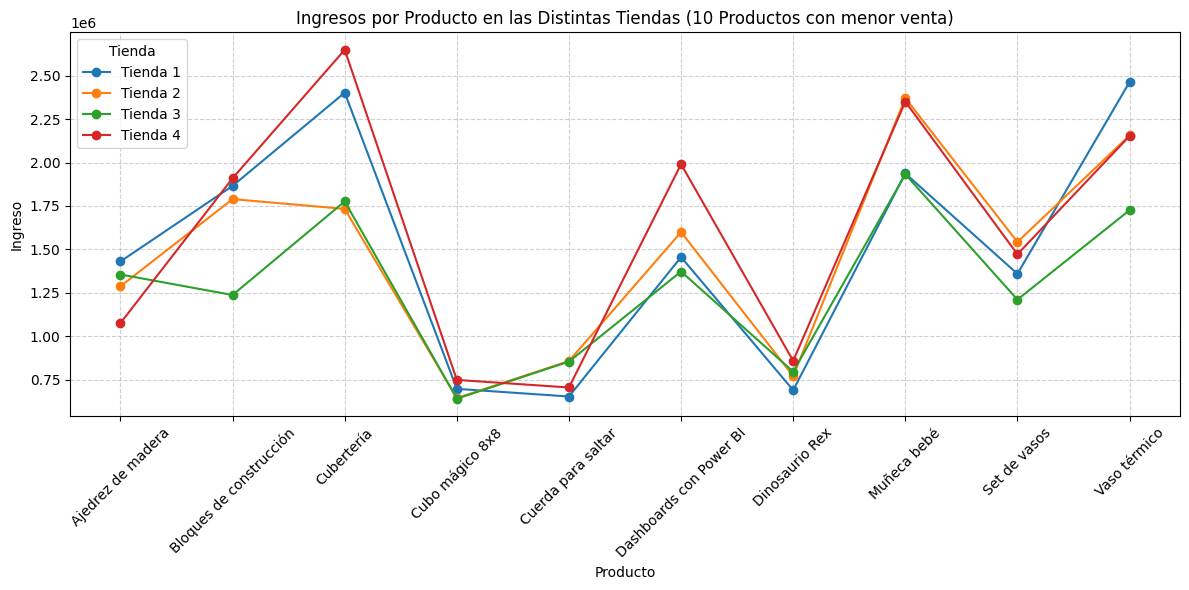

In [35]:
# Para generar gráfico de los 10 productos con menor venta
plt.figure(figsize=(12, 6))

for tienda in pivot.columns:
    plt.plot(pivot.index, pivot[tienda], marker='o', label=tienda)

plt.title('Ingresos por Producto en las Distintas Tiendas (10 Productos con menor venta)')
plt.xlabel('Producto')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()